Import libraries required

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
# Import Dataset
airline=pd.read_excel("C:/Users/Hp/Downloads/EastWestAirlines.xlsx",sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
# Column rename.

airline= airline.rename(columns={'ID#':'ID', 'Award?':'Award'})

Data preprocessing

In [6]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

airline1 = airline .drop(['ID','Award'], axis=1)
airline1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(airline1)      # this will used for kmeans
std_df.shape

(3999, 10)

MinMaxScalar

In [8]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(airline1)
minmax_df.shape

(3999, 10)

PCA

Running PCA of standardized data.

In [11]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [12]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [13]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [14]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

Conclusion:

By applying PCA on standardized data with 95% variance it gives 8 PCA components.

Running PCA of MinMaxscalar data.

In [16]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [17]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [18]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


Conclusion:

By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

KMeans Clustering.

How many numbers of cluster. Also deciding which transformation data we will use to build model.

In [19]:
from sklearn.cluster import KMeans

In [20]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3639788167896175
For n_clusters = 3 The average silhouette_score is : 0.335800689368627
For n_clusters = 4 The average silhouette_score is : 0.33811895596476305
For n_clusters = 5 The average silhouette_score is : 0.354575129869185
For n_clusters = 6 The average silhouette_score is : 0.3662869252330996
For n_clusters = 7 The average silhouette_score is : 0.2681253435179658
For n_clusters = 8 The average silhouette_score is : 0.2733658800277117
For n_clusters = 9 The average silhouette_score is : 0.29020780384748357


Conclusion By taking standardize data pca it gives number of cluster =6 with silhoette score = 0.36

In [21]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.15898102441788228
For n_clusters = 3 The average silhouette_score is : 0.15898102441788228
For n_clusters = 4 The average silhouette_score is : 0.15898102441788228
For n_clusters = 5 The average silhouette_score is : 0.15898102441788228
For n_clusters = 6 The average silhouette_score is : 0.15898102441788228
For n_clusters = 7 The average silhouette_score is : 0.15898102441788228
For n_clusters = 8 The average silhouette_score is : 0.15898102441788228
For n_clusters = 9 The average silhouette_score is : 0.15898102441788228


Conclusion: By taking pca_minmax_df data it gives minimum number of cluster =4 with silhoette score = 0.1589

Run K-Means

In [22]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3999,)

In [23]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [-1.04312258e+00,  2.60937871e-01, -1.57354688e-02,
        -8.62930270e-02, -5.29463412e-02,  1.40872802e-01,
         5.55074837e-02,  9.04844177e-04],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 1.39804051e+00, -1.00275351e+00, -7.94776789e-02,
         9.64914049e-02, -2.55443434e-01, -2.46040607e-01,
        -6.93666285e-02, -2.00121569e-02],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01]])

In [26]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16718.17004337416

In [27]:
model1.score(pca_std_df) 

# it is opposite value of sum of squared value..avoid to use it. It is bit confusing

-16718.17004337416

In [28]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

Hierarchical Clustering Algorithm

How many numbers of cluster. Also deciding which transformation data we will use to build model.

In [30]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.3139605594950567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258402005485834
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595573832017467

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3099513555846737
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965798717740988
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965798717740988
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592925058168969

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3282481973781311
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6569044547102614
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6940154925011895
For n

Conclusion: Although max score is with cluster numbers 4. I have selected tcluster number = 5

Taking MinMax transformation data & PCA applied on it.

In [31]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4526351664478745
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.585780896047594
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5003973034034863
For n_clusters = 2 The average silhouette_score with linkage- single : 0.6061073734453644

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3739125364654646
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4542833655116026
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4506426101878887
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5029366855064075

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.36547786997315546
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.45615471007123665
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3946568858456752
For 

Conclusion: dataset with MinMax transformation & PCA applied on it doesn't imporoved score here. So i am taking previous cell code conclusion.

Run Hierarchical Clustering.(Agglomerative Clustering)

In [32]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [34]:
# cluster labels for each point

agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

3999

In [36]:
# The children of each non-leaf node. Values less than n_samples correspond to leaves of 
#......the tree which are the original samples. A node i greater than or equal to n_samples 
#.........is a non-leaf node and has children children_[i - n_samples]. Alternatively at the 
#...........i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i

agg_clustering.children_

array([[3370, 3876],
       [1826, 2121],
       [2678, 2679],
       ...,
       [7991, 7993],
       [7986, 7994],
       [7988, 7995]])

In [37]:
# Clustering Score

(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

66.804

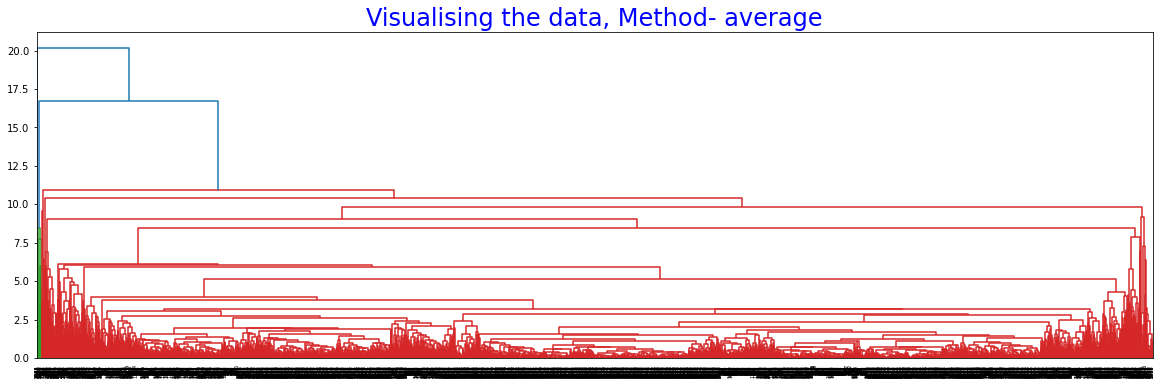

In [38]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [39]:
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [40]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([airline.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


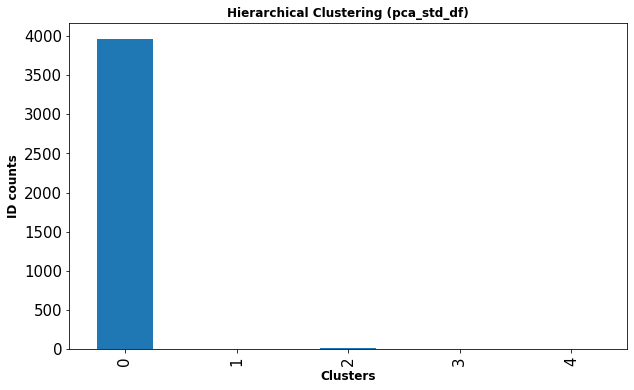

In [41]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Conclusion: We will go with Kmeans Clustering Since in hierarchiacl clustering all data is gatherd in one cluster only.